In [93]:
pip install pandas

You should consider upgrading via the '/Users/harisnaveed/Documents/WashU_University/Spring 2023/Software_engineering_workshop/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [94]:
pip install matplotlib 

You should consider upgrading via the '/Users/harisnaveed/Documents/WashU_University/Spring 2023/Software_engineering_workshop/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install seaborn

You should consider upgrading via the '/Users/harisnaveed/Documents/WashU_University/Spring 2023/Software_engineering_workshop/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [96]:
pip install scikit-learn

You should consider upgrading via the '/Users/harisnaveed/Documents/WashU_University/Spring 2023/Software_engineering_workshop/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
import pickle 

set_config(display='diagram')
%matplotlib inline

In [98]:
data = pd.read_csv('tmdb_movie_info.csv')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3339 non-null   int64  
 1   adult              3339 non-null   bool   
 2   backdrop_path      3317 non-null   object 
 3   genre_ids          3339 non-null   object 
 4   id                 3339 non-null   int64  
 5   original_language  3339 non-null   object 
 6   original_title     3339 non-null   object 
 7   overview           3335 non-null   object 
 8   popularity         3339 non-null   float64
 9   poster_path        3337 non-null   object 
 10  release_date       3339 non-null   object 
 11  title              3339 non-null   object 
 12  video              3339 non-null   bool   
 13  vote_average       3339 non-null   float64
 14  vote_count         3339 non-null   int64  
 15  genres             3339 non-null   object 
 16  top_cast           3339 

In [100]:
data

,Unnamed: 0,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,top_cast
0,0,False,/xDMIl84Qo5Tsu62c9DGWhmPI67A.jpg,"[28, 12, 878]",505642,en,Black Panther: Wakanda Forever,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",6117.070,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,2022-11-11,Black Panther: Wakanda Forever,False,7.5,3036,"['Action', 'Adventure', 'Science Fiction']","['Letitia Wright', ""Lupita Nyong'o"", 'Danai Gu..."
1,1,False,/9Rq14Eyrf7Tu1xk0Pl7VcNbNh1n.jpg,"[28, 12, 53]",646389,en,Plane,After a heroic job of successfully landing his...,4867.593,/2g9ZBjUfF1X53EinykJqiBieUaO.jpg,2023-01-13,Plane,False,6.8,359,"['Action', 'Adventure', 'Thriller']","['Gerard Butler', 'Mike Colter', 'Yoson An', '..."
2,2,False,/tGwO4xcBjhXC0p5qlkw37TrH6S6.jpg,"[16, 12, 35, 10751, 14]",315162,en,Puss in Boots: The Last Wish,Puss in Boots discovers that his passion for a...,3560.972,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,2022-12-21,Puss in Boots: The Last Wish,False,8.5,3626,"['Adventure', 'Animation', 'Comedy', 'Family',...","['Antonio Banderas', 'Salma Hayek', 'Harvey Gu..."
3,3,False,/t72ZvOZwtvcjZivZCFtCtL8QWb0.jpg,"[28, 10749, 35]",758009,en,Shotgun Wedding,Darcy and Tom gather their families for the ul...,3205.138,/t79ozwWnwekO0ADIzsFP1E5SkvR.jpg,2023-01-18,Shotgun Wedding,False,6.4,396,"['Action', 'Comedy', 'Romance']","['Jennifer Lopez', 'Josh Duhamel', 'Jennifer C..."
4,4,False,/q2fY4kMXKoGv4CQf310MCxpXlRI.jpg,"[878, 27, 35]",536554,en,M3GAN,A brilliant toy company roboticist uses artifi...,1998.608,/d9nBoowhjiiYc4FBNtQkPY7c11H.jpg,2023-01-06,M3GAN,False,7.5,1530,"['Comedy', 'Horror', 'Science Fiction']","['Allison Williams', 'Violet McGraw', 'Jenna D..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,3334,False,/ue9ScDQ60jzMAuZ54tm4mTdLFfq.jpg,"[28, 12, 18]",9433,en,The Edge,The plane carrying wealthy Charles Morse crash...,21.372,/mwzaD2KmWzGUyVJtcUUilH9EbtL.jpg,1997-09-26,The Edge,False,6.8,985,"['Action', 'Adventure', 'Drama']","['Anthony Hopkins', 'Alec Baldwin', 'Elle Macp..."
3335,3335,False,/fgffluhvdOv79SkYaKrfRA0xkf4.jpg,[18],334543,en,Lion,A five-year-old Indian boy gets lost on the st...,21.370,/iBGRbLvg6kVc7wbS8wDdVHq6otm.jpg,2016-11-25,Lion,False,8.1,5957,['Drama'],"['Dev Patel', 'Rooney Mara', 'David Wenham', '..."
3336,3336,False,/sbuvH7mL7qDZozBCRUrPaP1WbqS.jpg,[27],112454,en,Clown,A loving father finds a clown suit for his son...,21.370,/uNvbakoHyQYqeWanOw3mF3troWU.jpg,2016-06-17,Clown,False,5.7,1186,['Horror'],"['Andy Powers', 'Peter Stormare', 'Laura Allen..."
3337,3337,False,/3HTK3FtjK5GXIvPswaIMBMHeL3E.jpg,"[27, 53]",1975,en,The Grudge 2,A young woman encounters a malevolent supernat...,21.370,/gzr7ywaU9mUfASN57FYsKRFb4l0.jpg,2006-10-13,The Grudge 2,False,5.5,882,"['Horror', 'Thriller']","['Amber Tamblyn', 'Sarah Michelle Gellar', 'Ed..."


In [101]:
data = data.drop(columns=['adult','video','backdrop_path','poster_path','Unnamed: 0', 'release_date', 'original_title'])

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          3339 non-null   object 
 1   id                 3339 non-null   int64  
 2   original_language  3339 non-null   object 
 3   overview           3335 non-null   object 
 4   popularity         3339 non-null   float64
 5   title              3339 non-null   object 
 6   vote_average       3339 non-null   float64
 7   vote_count         3339 non-null   int64  
 8   genres             3339 non-null   object 
 9   top_cast           3339 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 261.0+ KB


In [103]:
data.isnull().sum()

genre_ids            0
id                   0
original_language    0
overview             4
popularity           0
title                0
vote_average         0
vote_count           0
genres               0
top_cast             0
dtype: int64

In [104]:
data['genres']

0              ['Action', 'Adventure', 'Science Fiction']
1                     ['Action', 'Adventure', 'Thriller']
2       ['Adventure', 'Animation', 'Comedy', 'Family',...
3                         ['Action', 'Comedy', 'Romance']
4                 ['Comedy', 'Horror', 'Science Fiction']
                              ...                        
3334                     ['Action', 'Adventure', 'Drama']
3335                                            ['Drama']
3336                                           ['Horror']
3337                               ['Horror', 'Thriller']
3338                                           ['Comedy']
Name: genres, Length: 3339, dtype: object

In [105]:
def clean(data,column_name):
    """This function takes a column from the dataframe and splits two elements
       if they are separated by a comma.
       For ex. in Actors column there might be values such as Christian Bale, Morgan Freeman.
       This will separate these two actors and store them individually in a list."""
    name=set()
    for name_string in data[column_name]:
        name_string = name_string.replace("'","")
        name_string = name_string.replace('[','').replace(']','')
        name.update(name_string.split(', '))
    name=sorted(name)
    name.pop(0)
    return name

In [106]:
genre_set = clean(data,'genres')
genre_set

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [107]:
# def creating_more_columns(data,column):
#     data_list_for_movies = list()
#     for i in range(len(data)):
#         data[i] = data[i].replace('[', '').replace(']','').replace("'","")
#         data_list_per_movie = data[i].split(',')
#         data_list_for_movies.append(data_list_per_movie)
    
#     data_dataframe = pd.DataFrame(data_list_for_movies)
#     data_dataframe = pd.DataFrame(data_list_for_movies, columns=[f'{column}_{i}' for i in range(len(data_dataframe.columns))])
#     return data_dataframe

In [108]:
#genre_dataframe = creating_more_columns(data.genres, "genre")
#top_cast_dataframe = creating_more_columns(data.top_cast, "top_cast")

#Get the unique genres contained in the dataframe
genres=clean(data,'genres')
#Add one column for every genre in the dataframe
for genre in genres:
    data["genre:"+genre] = [int(genre in g) for g in data.genres]

data[data['genre:Action'] == 1]

,genre_ids,id,original_language,overview,popularity,title,vote_average,vote_count,genres,top_cast,...,genre:History,genre:Horror,genre:Music,genre:Mystery,genre:Romance,genre:Science Fiction,genre:TV Movie,genre:Thriller,genre:War,genre:Western
0,"[28, 12, 878]",505642,en,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",6117.070,Black Panther: Wakanda Forever,7.5,3036,"['Action', 'Adventure', 'Science Fiction']","['Letitia Wright', ""Lupita Nyong'o"", 'Danai Gu...",...,0,0,0,0,0,1,0,0,0,0
1,"[28, 12, 53]",646389,en,After a heroic job of successfully landing his...,4867.593,Plane,6.8,359,"['Action', 'Adventure', 'Thriller']","['Gerard Butler', 'Mike Colter', 'Yoson An', '...",...,0,0,0,0,0,0,0,1,0,0
3,"[28, 10749, 35]",758009,en,Darcy and Tom gather their families for the ul...,3205.138,Shotgun Wedding,6.4,396,"['Action', 'Comedy', 'Romance']","['Jennifer Lopez', 'Josh Duhamel', 'Jennifer C...",...,0,0,0,0,1,0,0,0,0,0
5,"[28, 53, 80]",1035806,en,Detective James Knight 's last-minute assignme...,1803.430,Detective Knight: Independence,6.4,52,"['Action', 'Crime', 'Thriller']","['Bruce Willis', 'Jack Kilmer', 'Lochlyn Munro...",...,0,0,0,0,0,0,0,1,0,0
7,"[878, 12, 28]",76600,en,Set more than a decade after the events of the...,1601.327,Avatar: The Way of Water,7.7,5240,"['Action', 'Adventure', 'Science Fiction']","['Sam Worthington', 'Zoe Saldaña', 'Sigourney ...",...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,"[28, 9648, 53]",29812,en,When teacher Randall Thomasson is killed durin...,21.395,The Substitute 2: School's Out,5.9,68,"['Action', 'Mystery', 'Thriller']","['Treat Williams', 'BD Wong', 'Angel David', '...",...,0,0,0,1,0,0,0,1,0,0
3328,"[28, 80, 18, 36, 53]",388399,en,In the aftermath of an unspeakable act of terr...,21.388,Patriots Day,7.0,2277,"['Action', 'Crime', 'Drama', 'History', 'Thril...","['Mark Wahlberg', 'John Goodman', 'J.K. Simmon...",...,1,0,0,0,0,0,0,1,0,0
3329,"[878, 28, 53]",426865,en,"A college student, who sees a UFO, uses his ex...",21.385,UFO,7.0,366,"['Action', 'Science Fiction', 'Thriller']","['Gillian Anderson', 'Ella Purnell', 'David St...",...,0,0,0,0,0,1,0,1,0,0
3331,"[12, 28, 18]",2119,en,Talented but unproven stock car driver Cole Tr...,21.385,Days of Thunder,6.3,1220,"['Action', 'Adventure', 'Drama']","['Tom Cruise', 'Robert Duvall', 'Nicole Kidman...",...,0,0,0,0,0,0,0,0,0,0


In [109]:
#data = data.join(genre_dataframe)

array([[<Axes: xlabel='popularity', ylabel='popularity'>,
        <Axes: xlabel='vote_average', ylabel='popularity'>,
        <Axes: xlabel='vote_count', ylabel='popularity'>],
       [<Axes: xlabel='popularity', ylabel='vote_average'>,
        <Axes: xlabel='vote_average', ylabel='vote_average'>,
        <Axes: xlabel='vote_count', ylabel='vote_average'>],
       [<Axes: xlabel='popularity', ylabel='vote_count'>,
        <Axes: xlabel='vote_average', ylabel='vote_count'>,
        <Axes: xlabel='vote_count', ylabel='vote_count'>]], dtype=object)

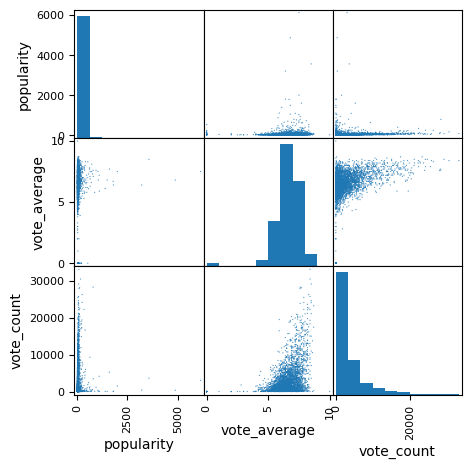

In [110]:
num_features = ['popularity', 'vote_average', 'vote_count']
pd.plotting.scatter_matrix(data[num_features], figsize=(5, 5), s=3, alpha=0.8)

/var/folders/45/qlwbzhhd6rz66nyd38m1m8yr0000gn/T/ipykernel_38501/2996087454.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='seismic', annot=True)


<Axes: >

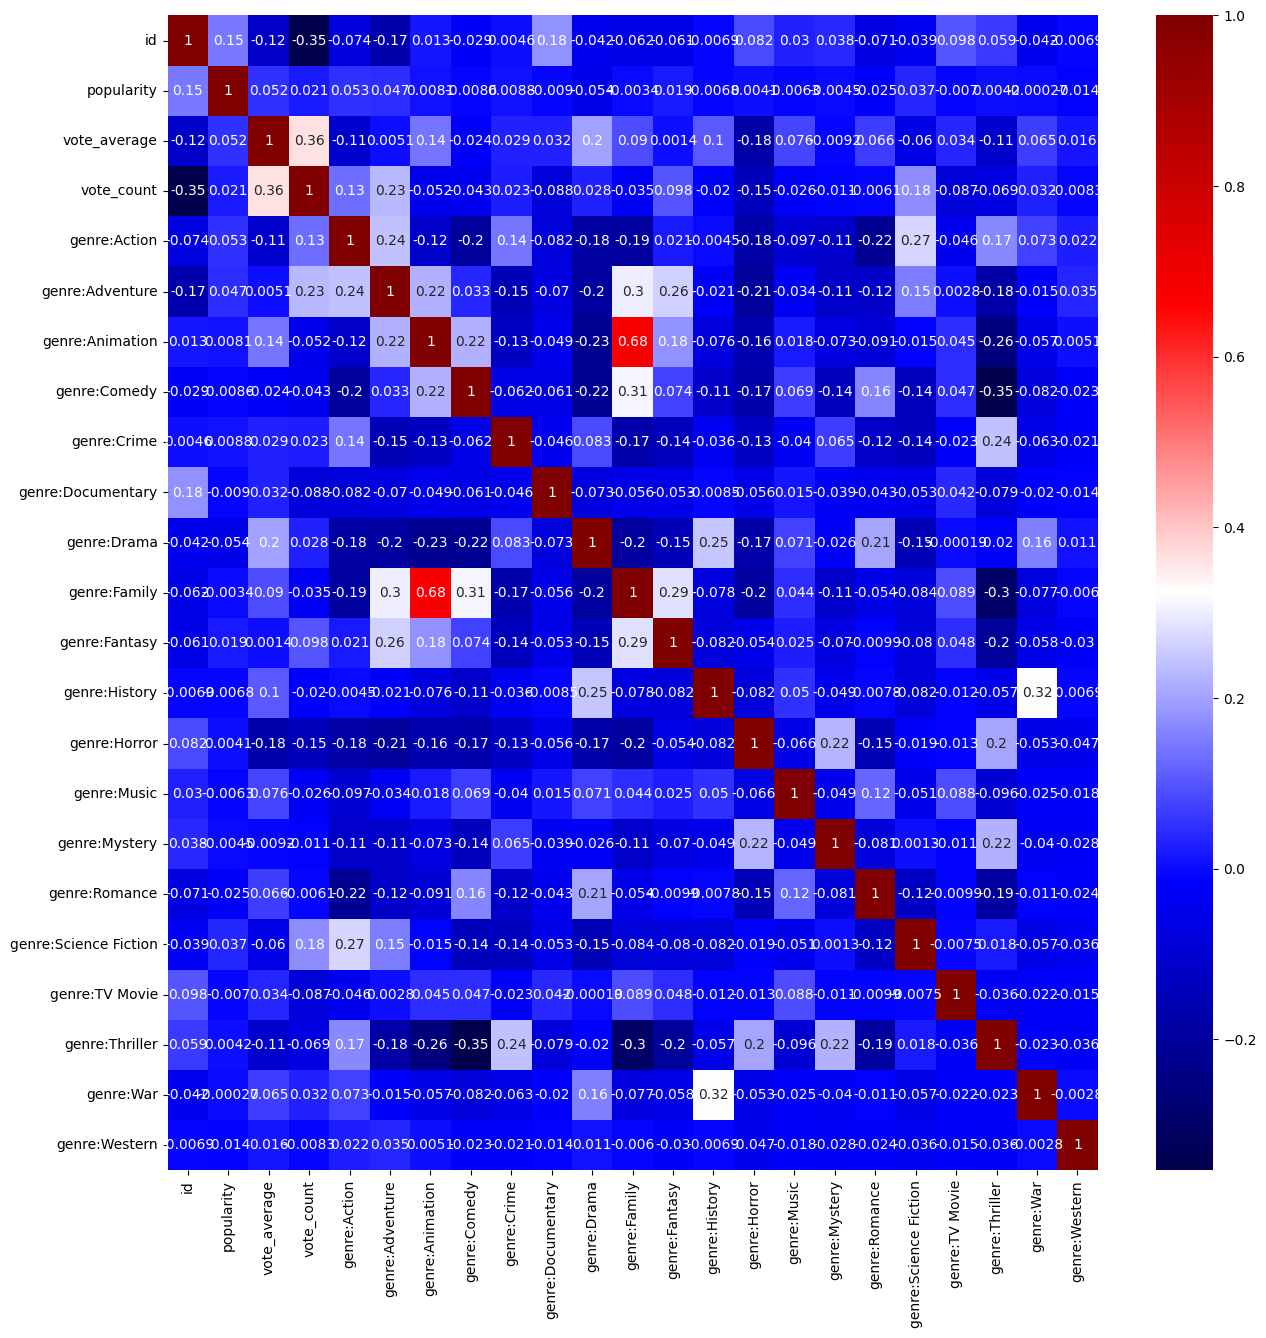

In [111]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap='seismic', annot=True)

In [112]:
data

,genre_ids,id,original_language,overview,popularity,title,vote_average,vote_count,genres,top_cast,...,genre:History,genre:Horror,genre:Music,genre:Mystery,genre:Romance,genre:Science Fiction,genre:TV Movie,genre:Thriller,genre:War,genre:Western
0,"[28, 12, 878]",505642,en,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",6117.070,Black Panther: Wakanda Forever,7.5,3036,"['Action', 'Adventure', 'Science Fiction']","['Letitia Wright', ""Lupita Nyong'o"", 'Danai Gu...",...,0,0,0,0,0,1,0,0,0,0
1,"[28, 12, 53]",646389,en,After a heroic job of successfully landing his...,4867.593,Plane,6.8,359,"['Action', 'Adventure', 'Thriller']","['Gerard Butler', 'Mike Colter', 'Yoson An', '...",...,0,0,0,0,0,0,0,1,0,0
2,"[16, 12, 35, 10751, 14]",315162,en,Puss in Boots discovers that his passion for a...,3560.972,Puss in Boots: The Last Wish,8.5,3626,"['Adventure', 'Animation', 'Comedy', 'Family',...","['Antonio Banderas', 'Salma Hayek', 'Harvey Gu...",...,0,0,0,0,0,0,0,0,0,0
3,"[28, 10749, 35]",758009,en,Darcy and Tom gather their families for the ul...,3205.138,Shotgun Wedding,6.4,396,"['Action', 'Comedy', 'Romance']","['Jennifer Lopez', 'Josh Duhamel', 'Jennifer C...",...,0,0,0,0,1,0,0,0,0,0
4,"[878, 27, 35]",536554,en,A brilliant toy company roboticist uses artifi...,1998.608,M3GAN,7.5,1530,"['Comedy', 'Horror', 'Science Fiction']","['Allison Williams', 'Violet McGraw', 'Jenna D...",...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,"[28, 12, 18]",9433,en,The plane carrying wealthy Charles Morse crash...,21.372,The Edge,6.8,985,"['Action', 'Adventure', 'Drama']","['Anthony Hopkins', 'Alec Baldwin', 'Elle Macp...",...,0,0,0,0,0,0,0,0,0,0
3335,[18],334543,en,A five-year-old Indian boy gets lost on the st...,21.370,Lion,8.1,5957,['Drama'],"['Dev Patel', 'Rooney Mara', 'David Wenham', '...",...,0,0,0,0,0,0,0,0,0,0
3336,[27],112454,en,A loving father finds a clown suit for his son...,21.370,Clown,5.7,1186,['Horror'],"['Andy Powers', 'Peter Stormare', 'Laura Allen...",...,0,1,0,0,0,0,0,0,0,0
3337,"[27, 53]",1975,en,A young woman encounters a malevolent supernat...,21.370,The Grudge 2,5.5,882,"['Horror', 'Thriller']","['Amber Tamblyn', 'Sarah Michelle Gellar', 'Ed...",...,0,1,0,0,0,0,0,1,0,0


In [113]:
data.describe()

,id,popularity,vote_average,vote_count,genre:Action,genre:Adventure,genre:Animation,genre:Comedy,genre:Crime,genre:Documentary,...,genre:History,genre:Horror,genre:Music,genre:Mystery,genre:Romance,genre:Science Fiction,genre:TV Movie,genre:Thriller,genre:War,genre:Western
count,3.339000e+03,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,...,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000
mean,2.900122e+05,61.943603,6.548248,3240.943097,0.341719,0.253968,0.143756,0.293501,0.127883,0.014376,...,0.033543,0.178197,0.022761,0.093741,0.111411,0.161426,0.017071,0.300389,0.026655,0.013178
std,3.183587e+05,187.588184,1.109907,4149.703627,0.474357,0.435345,0.350894,0.455434,0.334009,0.119051,...,0.180077,0.382736,0.149164,0.291511,0.314687,0.367978,0.129555,0.458496,0.161096,0.114052
min,5.000000e+00,21.367000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.033050e+04,25.539000,6.100000,489.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.474410e+05,33.164000,6.600000,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.226540e+05,52.469000,7.200000,4333.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.081694e+06,6117.070000,10.000000,33163.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
data['genre:Action'].value_counts()[1]

1141

TypeError: only size-1 arrays can be converted to Python scalars

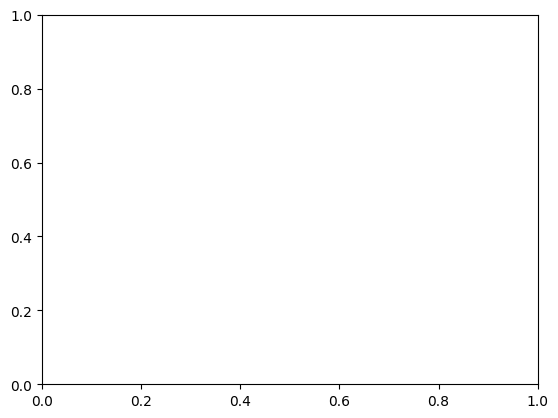

In [127]:
genre_list = [column for column in data.columns if column.startswith("genre:")]
plt.hist(data[genre_list],)



In [114]:
# preprocessor = Pipeline(steps=[
#     ('ColumnTransformerArtistColumn', ColumnTransformer(transformers=[
#         ('column_drop', 'drop', ['artist']), # remove artists feature
#         ('Log_transform', FunctionTransformer(np.log), ['liveness', 'speechiness', 'count']), 
#     ],remainder='passthrough')),
#     ('Standard_scaler', StandardScaler()),
    
#     ('PCA', PCA(n_components=0.99)),
# ])